In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("../Data/Twitter.csv", header=None, encoding='latin-1') #Ich musste hier latin 1 encoding verwenden da es mit dem Standard UTF-8 Encoding Zeichen gab die nicht gelesen werden konnten. Vielleicht Smileys oder so?
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'tweet']
data

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [55]:
data['query'].unique()

array(['NO_QUERY'], dtype=object)

In [57]:
#Convert Date and time column into datetime format (By stripping day, month, year and time manually as strings and passing them into datetime function)
data['date_new'] = data['date'].str[8:10] + "/" + data['date'].str[4:7] + "/" + data['date'].str[24:28] + ", " + data['date'].str[11:19]
data['date_new'] = pd.to_datetime(data['date_new'], format="%d/%b/%Y, %H:%M:%S")

#extract DateTime information from column
data['year'] = pd.DatetimeIndex(data['date_new']).year
data['month'] = pd.DatetimeIndex(data['date_new']).month

#Weekday where 0 = Monday and 6 = Sunday
data['weekday'] = pd.DatetimeIndex(data['date_new']).weekday
data['time'] = pd.DatetimeIndex(data['date_new']).time
data['hour'] = pd.DatetimeIndex(data['date_new']).hour

# Extract Timezones
data['date'] = data['date'].astype('string')
data['timezone'] = data['date'].str[20:23]
data.head()

##sort time into groups
#create list of conditions (time groups)
conditions = [
    (data['hour'] < 4),
    (data['hour'] >= 4) & (data['hour'] < 8),
    (data['hour'] >= 8) & (data['hour'] < 12),
    (data['hour'] >= 12) & (data['hour'] < 16),
    (data['hour'] >= 16) & (data['hour'] < 20),
    (data['hour'] >= 20)
    ]

# create a list of the values we want to assign for each condition
values = ['0-4', '4-8', '8-12', '12-16', '16-20', '20-24']

# create a new column and use np.select to assign values to it using our lists as arguments
data['time_group'] = np.select(conditions, values)

#drop old date column
data.drop(['date', 'query'], axis = 1, inplace=True)

data.head()

,sentiment,id,user,tweet,date_new,year,month,weekday,time,hour,timezone,time_group
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,2009,4,0,22:19:45,22,PDT,20-24
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,2009,4,0,22:19:49,22,PDT,20-24
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,2009,4,0,22:19:53,22,PDT,20-24
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,2009,4,0,22:19:57,22,PDT,20-24
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,2009,4,0,22:19:57,22,PDT,20-24


In [21]:
data['timezone'].unique()

<StringArray>
['PDT']
Length: 1, dtype: string

In [8]:
data.isna().sum()

sentiment    0
id           0
date         0
query        0
user         0
tweet        0
dtype: int64

In [7]:
data['sentiment'].unique()
#0= Schlecht, 4 = Gut

array([0, 4], dtype=int64)

<AxesSubplot:xlabel='weekday', ylabel='count'>

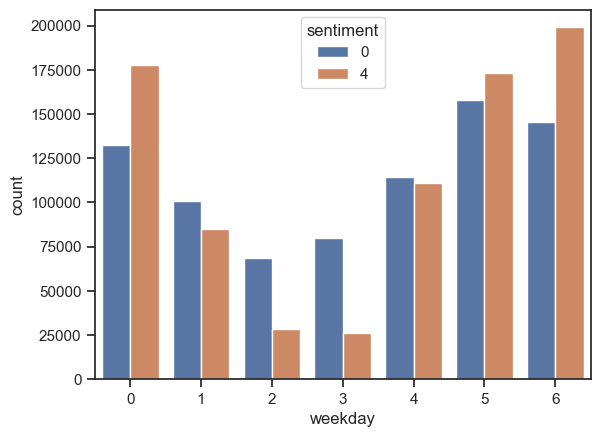

In [60]:
#Weekday: 0 = Monday, 6 = Sunday
sns.countplot(data=data, x="weekday", hue="sentiment")

#### Samstag bis Sonntag positiveres Sentiment

<AxesSubplot:xlabel='time_group', ylabel='count'>

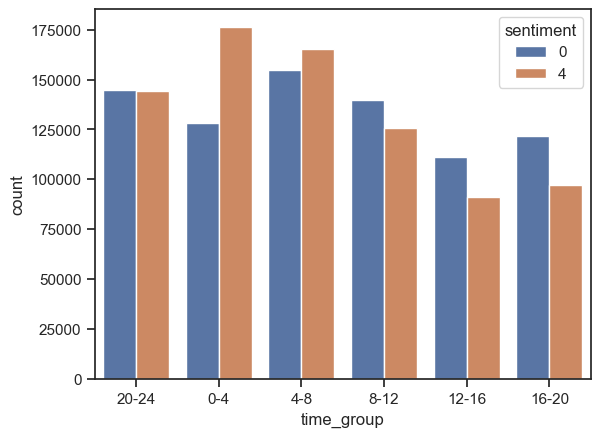

In [61]:
#Time of Day
sns.countplot(data=data, x="time_group", hue="sentiment")

#### Nachts und früh morgens eher positives Sentiment

<AxesSubplot:xlabel='month', ylabel='count'>

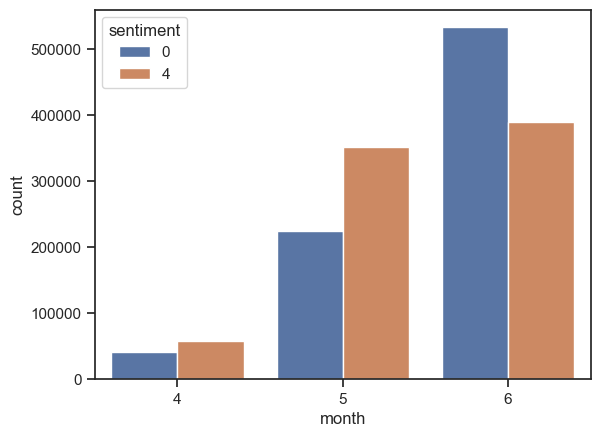

In [62]:
#Time of Day
sns.countplot(data=data, x="month", hue="sentiment")

#### Mai und Juni mit sichtlichen Unterschieden. Leider kein Datensatz über das gesamte Jahr verfügbar...Daten nachholen?

In [65]:
%pip install plotly


     ---------------------------------------- 15.3/15.3 MB 2.0 MB/s eta 0:00:00


In [68]:
%pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [70]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=300).generate_from_frequencies(data['tweet'])

plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ValueError: could not convert string to float: 'ï¿½ï¿½ï¿½ï¿½ï¿½ß§ï¿½Ç¿ï¿½ï¿½ï¿½ï¿½ï¿½Ð¶ï¿½Ø\x9cï¿½ï¿½ï¿½ &lt;&lt;----I DID NOT KNOW I CUD or HOW TO DO ALL DAT ON MY PHONE TIL NOW. WOW..MY LIFE IS NOW COMPLETE.  JK.'